In [15]:
import pandas as pd
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import graphviz
from sklearn.tree import export_graphviz

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zerry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
df = pd.read_excel('Dataset (2).xlsx')

In [18]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_words = set(nltk.corpus.stopwords.words('indonesian'))

# Fungsi pembersihan teks (preprocessing)
def clean_text(text):

    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    text = text.lower()
    
    words = [word for word in text.split() if word not in stop_words]
    
    stemmed_words = [stemmer.stem(word) for word in words]
    
    return ' '.join(stemmed_words)

In [19]:
df['Cleaned_Tweet'] = df['text'].apply(clean_text)

In [20]:
# def print_tokens(text):
#     tokens = text.split()
#     print(', '.join(tokens))

# df['Cleaned_Tweet'].apply(print_tokens)

In [21]:
# tokens = []
# for text in df['Cleaned_Tweet']:
#     tokens.extend(text.split())

# token_df = pd.DataFrame({'token': tokens})

In [22]:
df_token = pd.read_excel('token(1).xlsx')
df_pos = df_token[df_token['Label'] == 1]
df_neg = df_token[df_token['Label'] == 2]

In [23]:
# Pelabelan Sentimen Manual untuk Teks

positive_words = df_pos['token'].tolist()
negative_words = df_neg['token'].tolist()

def manual_sentiment_label(text):
    words = text.split()
    positive_count = 0
    negative_count = 0
    
    for word in words:
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1
    

    if positive_count > negative_count:
        return 1 
    elif negative_count > positive_count:
        return 0 
    else:
        return 2 

df['Manual_Sentiment'] = df['Cleaned_Tweet'].apply(manual_sentiment_label)

In [24]:
df['Manual_Sentiment']

0      0
1      1
2      1
3      0
4      1
      ..
543    1
544    2
545    2
546    2
547    0
Name: Manual_Sentiment, Length: 548, dtype: int64

In [25]:
df['Cleaned_Tweet']

0      ubah iklim fake agenda israel tenggelam israel...
1      udara bersih kutuk james watt mesin uap timbul...
2      fesyen seru kalo layer tinggal negara tropis h...
3      salah jarang perhati publik dampak krisis ikli...
4      carbon trade mahasiswa negara maju curang lewa...
                             ...                        
543    hadir eselon direktur jenderal kendali ubah ik...
544    orang ribut jejak karbon efek rumah kaca ubah ...
545                      ubah iklim hutan bas masyarakat
546                   ubah iklim rusak ozon ulah manusia
547    produksi beras tanah air cukup butuh masyaraka...
Name: Cleaned_Tweet, Length: 548, dtype: object

In [26]:
def token_sentiment(text):
    words = text.split() 
    sentiment_per_word = []
    
    for word in words:
        if word in positive_words:
            sentiment_per_word.append((word, "Positif"))
        elif word in negative_words:
            sentiment_per_word.append((word, "Negatif"))
        else:
            sentiment_per_word.append((word, "Netral"))
    
    return sentiment_per_word

In [27]:
df['Token_Sentiment'] = df['Cleaned_Tweet'].apply(token_sentiment)

In [28]:
df['Token_Sentiment']

0      [(ubah, Netral), (iklim, Netral), (fake, Netra...
1      [(udara, Netral), (bersih, Positif), (kutuk, N...
2      [(fesyen, Netral), (seru, Positif), (kalo, Net...
3      [(salah, Negatif), (jarang, Negatif), (perhati...
4      [(carbon, Netral), (trade, Netral), (mahasiswa...
                             ...                        
543    [(hadir, Netral), (eselon, Netral), (direktur,...
544    [(orang, Netral), (ribut, Netral), (jejak, Net...
545    [(ubah, Netral), (iklim, Netral), (hutan, Netr...
546    [(ubah, Netral), (iklim, Netral), (rusak, Netr...
547    [(produksi, Netral), (beras, Netral), (tanah, ...
Name: Token_Sentiment, Length: 548, dtype: object

In [29]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['Cleaned_Tweet']).toarray()
y = df['Manual_Sentiment']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
model = RandomForestClassifier(max_depth=None, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [32]:
# for i in range(3):
#     tree = model.estimators_[i]
#     dot_data = export_graphviz(tree,
#                             #    feature_names=X_train.columns,  
#                             #    class_names=y_train.values, 
#                                filled=True,  
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

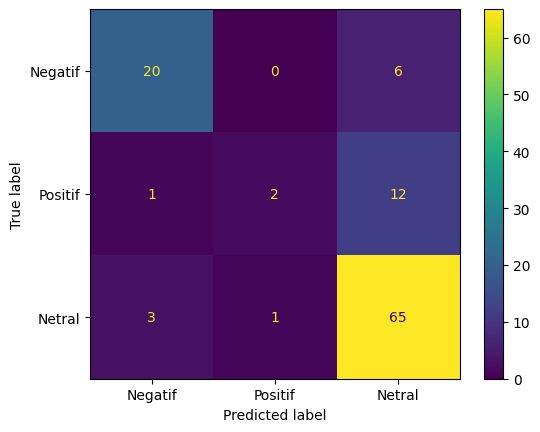

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negatif", "Positif", "Netral"]).plot()

In [34]:
report = classification_report(y_test, y_pred, target_names=["Negatif", "Positif", "Netral"])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.83      0.77      0.80        26
     Positif       0.67      0.13      0.22        15
      Netral       0.78      0.94      0.86        69

    accuracy                           0.79       110
   macro avg       0.76      0.61      0.63       110
weighted avg       0.78      0.79      0.76       110

